In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ice_cream = pd.read_csv('IceCreamData.csv')

In [64]:
ice_cream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [65]:
ice_cream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


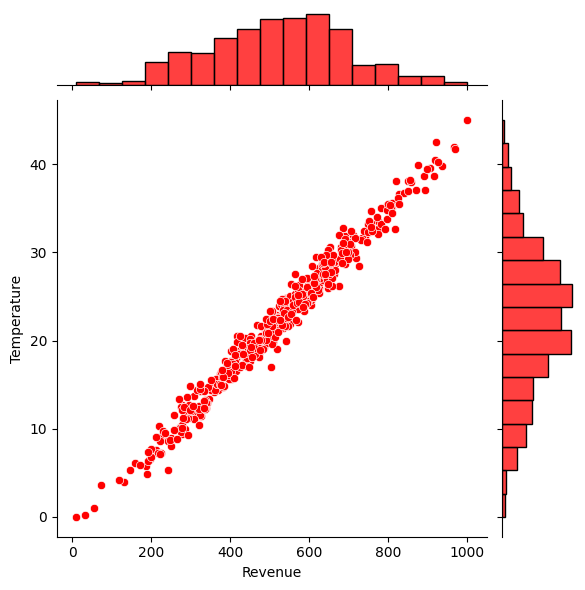

In [11]:
sns.jointplot(y = 'Temperature',
              x = 'Revenue',
              data = ice_cream,
              color = 'red')

In [ ]:
sns.pairplot(ice_cream)

In [ ]:
sns.lmplot(y = 'Temperature', x = 'Revenue', data = ice_cream, )

In [3]:
X = ice_cream[['Temperature']]
Y = ice_cream[['Revenue']]

In [4]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

## Train

In [12]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
print('Linear Model Coeff (slope): ', lr.coef_)
print('Linear Model Coeff (bias): ', lr.intercept_)

Linear Model Coeff (slope):  [[21.43080535]]
Linear Model Coeff (bias):  [45.43127283]


Set fit_intercept to False (bias=0)

In [18]:
lr2 = LinearRegression(fit_intercept=False)
lr2.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [19]:
print('Linear Model Coeff (slope): ', lr2.coef_)
print('Linear Model Coeff (bias): ', lr2.intercept_)

Linear Model Coeff (slope):  [[23.24274199]]
Linear Model Coeff (bias):  0.0


## Test

In [52]:
y_predict = lr.predict(X_test)

,Temperature
227,26.944123
17,42.515280
273,25.448240
314,25.725470
77,25.545966
...,...
308,33.314998
183,22.009874
13,13.624509
8,0.976870


Text(0.5, 1.0, 'Revenue vs. Temp (train data)')

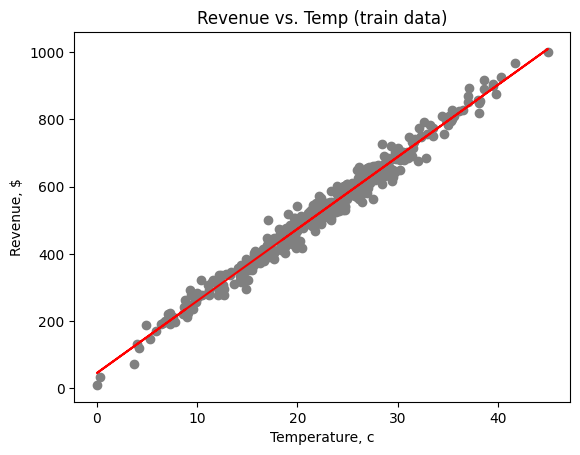

In [46]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.ylabel('Revenue, $')
plt.xlabel('Temperature, c')
plt.title('Revenue vs. Temp (train data)')

Text(0.5, 1.0, 'Revenue vs. Temp (test data)')

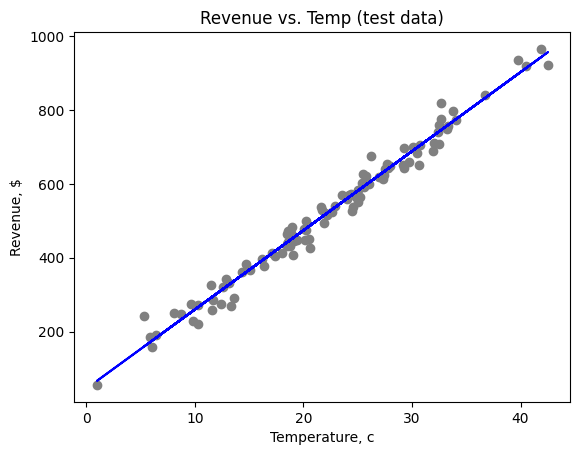

In [48]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, y_predict, color = 'blue')
plt.ylabel('Revenue, $')
plt.xlabel('Temperature, c')
plt.title('Revenue vs. Temp (test data)')

3 predictions:

In [63]:
T = pd.DataFrame({'Temperature': [12,15,5]})
new_pred = lr.predict(T)
print(new_pred)

[[302.600937  ]
 [366.89335304]
 [152.58529957]]
